## Summary

Below analyses implements two models: Desesion Tree and Random Forest. It is based on two reserch studies 'Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques' by Xie Z, Nikolayeva O, Luo J, Li D. and 'Developing risk prediction models for type 2 diabetes: a systematic review of methodology and reporting.' by Collins GS, Mallett S, Omar O, Yu LM.
As files of BRFSS Survey data presented with formats which are different from csv format, I've used Winston Larson work on github where he has done an extensive work on BRFSS data extracting and cleaning.

## References

[1] Xie Z, Nikolayeva O, Luo J, Li D. Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques. Prev Chronic Dis 2019;16:190109. DOI: http://dx.doi.org/10.5888/pcd16.190109external icon.

[2] Collins GS, Mallett S, Omar O, Yu LM. Developing risk prediction models for type 2 diabetes: a systematic review of methodology and reporting. BMC Med 2011;9(1):103. https://bmcmedicine.biomedcentral.com/articles/10.1186/1741-7015-9-103

[3] Larson W. Insights into health and behavior using data from the CDC. https://github.com/winstonlarson/brfss

[4] Nelson J. Decesion Trees. Adopted from Chapter 8 of An Introdutction to Statistical Learning. http://faculty.marshall.usc.edu/gareth-james/

## Importing the Data

In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
year = '2014'


#Using only 27 variables
df = pd.read_csv('/Users/annasoloveva/Downloads/brfss' + year + '.csv', 
                 encoding='cp1252', usecols = ['genhlth', 'x.ageg5yr','x.bmi5cat','checkup1',
                                               'income2','x.race','mscode','flushot6','employ1',
                                               'sex','marital','x.educag','sleptim1','cvdcrhd4','hlthcvr1','menthlth',
                                               'chckidny','useequip','x.totinda','addepev2','renthom1','exerany2',
                                               'blind','decide','hlthpln1','diabete3','x.smoker3'])

df.rename(columns = {'x.ageg5yr':'age','x.bmi5cat':'bmi_class',
                     'x.race':'race','x.educag':'education',
                     'x.smoker3':'smoker','x.totinda':'exercise'}, inplace=True)    

#df.dropna(inplace=True)
#df.hist(figsize=(20,20))
# Transform variable to normalize them
# Balance the data (diabete3)
# Visualizing a Decision Tree

df.describe()

,genhlth,menthlth,hlthpln1,checkup1,exerany2,sleptim1,cvdcrhd4,addepev2,chckidny,diabete3,...,decide,flushot6,hlthcvr1,mscode,exercise,race,age,bmi_class,education,smoker
count,464660.000000,464663.000000,464664.000000,464662.000000,464660.000000,464664.000000,464664.000000,464663.000000,464663.000000,464662.000000,...,448616.000000,442434.000000,306079.000000,293120.000000,464664.000000,464570.000000,464664.000000,433970.000000,464664.000000,464664.000000
mean,2.578653,65.080531,1.108392,1.582415,1.270869,8.078332,1.982762,1.835545,1.983521,2.752885,...,1.937430,1.583475,3.644089,2.820388,1.272761,1.992270,7.821852,2.933560,2.965599,3.563934
std,1.139014,35.660636,0.514010,1.251358,0.617598,8.666178,0.541203,0.555480,0.373325,0.729478,...,0.569489,0.772888,10.882556,1.673500,0.637571,2.246512,3.465952,0.826754,1.117239,1.517914
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,30.000000,1.000000,1.000000,1.000000,6.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,3.000000
50%,2.000000,88.000000,1.000000,1.000000,1.000000,7.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,8.000000,3.000000,3.000000,4.000000
75%,3.000000,88.000000,1.000000,2.000000,1.000000,8.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,3.000000,5.000000,1.000000,1.000000,10.000000,4.000000,4.000000,4.000000
max,9.000000,99.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,99.000000,5.000000,9.000000,9.000000,14.000000,4.000000,9.000000,9.000000


## Cleaning

In [4]:
#People under 30 might have type 1 diebetes which is not our main focus so we take them out
df['age'] = df['age'].mask(df['age'] < 3 , np.nan) # group 1 and 2 are younger than 30 
df['age'] = df['age'].mask(df['age'] > 13 , np.nan) #grpup 14 is na in githup clean data

#People who are pregnant and have predibetes are also not our main focus
df['diabete3'] = df['diabete3'].mask(df['diabete3'] == 2, np.nan) #yes but pregrnant 
df['diabete3'] = df['diabete3'].mask(df['diabete3'] == 4, np.nan) # prediabetes
df['diabete3'] = df['diabete3'].mask(df['diabete3'] > 4, np.nan)

In [5]:
#Dropping permanentley NA values and  we are left with 143383 observations
df.dropna(inplace=True)
df.describe()

,genhlth,menthlth,hlthpln1,checkup1,exerany2,sleptim1,cvdcrhd4,addepev2,chckidny,diabete3,...,decide,flushot6,hlthcvr1,mscode,exercise,race,age,bmi_class,education,smoker
count,174424.000000,174424.000000,174424.0,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,...,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000,174424.000000
mean,2.614457,66.610277,1.0,1.415063,1.259385,8.139367,1.969087,1.826383,1.973708,2.676077,...,1.926822,1.485186,3.481436,2.823253,1.261162,1.550435,9.083968,2.952151,2.972286,3.363344
std,1.133127,34.948232,0.0,1.068168,0.492792,8.691820,0.560380,0.502628,0.351411,0.736833,...,0.484475,0.584372,9.958902,1.666043,0.516528,1.677204,2.707141,0.821364,1.005269,1.009375
min,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,2.000000,30.000000,1.0,1.000000,1.000000,6.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.000000,2.000000,3.000000
50%,3.000000,88.000000,1.0,1.000000,1.000000,7.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,9.000000,3.000000,3.000000,4.000000
75%,3.000000,88.000000,1.0,1.000000,2.000000,8.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,3.000000,5.000000,2.000000,1.000000,11.000000,4.000000,4.000000,4.000000
max,9.000000,99.000000,1.0,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,3.000000,...,9.000000,9.000000,99.000000,5.000000,9.000000,9.000000,13.000000,4.000000,9.000000,9.000000


In [6]:
#Building histogram for all variables
#df.hist(figsize=(20,20))

In [7]:
#Is data balanced? It is.
df.diabete3.value_counts(normalize=True)

3.0    0.838038
1.0    0.161962
Name: diabete3, dtype: float64

In [8]:
#Defining feature columns and independent variable, diabete3
#Diabete3 variable is an answer to a questions 'Have you ever been told you have diabetes?'
#and it has 4 possible answers 1: Yes, 2: Yes but pregnant, 3: No, 4: Prediabetes

feature_cols = ['genhlth', 'age','bmi_class','checkup1',
                'income2','race','mscode','flushot6','employ1',
                'sex','marital','education','sleptim1','cvdcrhd4','hlthcvr1','menthlth',
                'chckidny','useequip','exercise','addepev2','renthom1','exerany2',
                'blind','decide','hlthpln1','smoker']

X = df[feature_cols]
y = df.diabete3

## Create Train and Test Data

In [9]:
#Split the data into Training and Testing Set

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size=0.3)

In [10]:
X_train.shape

(122096, 26)

In [11]:
X_test.shape

(52328, 26)

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=50)
# Train tree
tree.fit(X_train, y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 46567 nodes with maximum depth 46.


In [13]:
#Using fitted model, make predictions
X_train_tree_predictions = tree.predict(X_train)
X_train_tree_probs = tree.predict_proba(X_train)[:, 1]

tree_predictions = tree.predict(X_test)
tree_probs = tree.predict_proba(X_test)[:, 1]

In [14]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc

roc_value = roc_auc_score(y_test, tree_probs)
roc_value

0.5920932709138681

In [15]:
feature_tree = pd.DataFrame({'Feature': feature_cols,
                   'Importance': tree.feature_importances_}).\
                    sort_values('Importance', ascending = False)
feature_tree.head(10)

,Feature,Importance
0,genhlth,0.096060
4,income2,0.094415
12,sleptim1,0.087862
1,age,0.082386
14,hlthcvr1,0.059937
6,mscode,0.059406
11,education,0.058098
15,menthlth,0.056379
10,marital,0.048335
25,smoker,0.047648


In [16]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

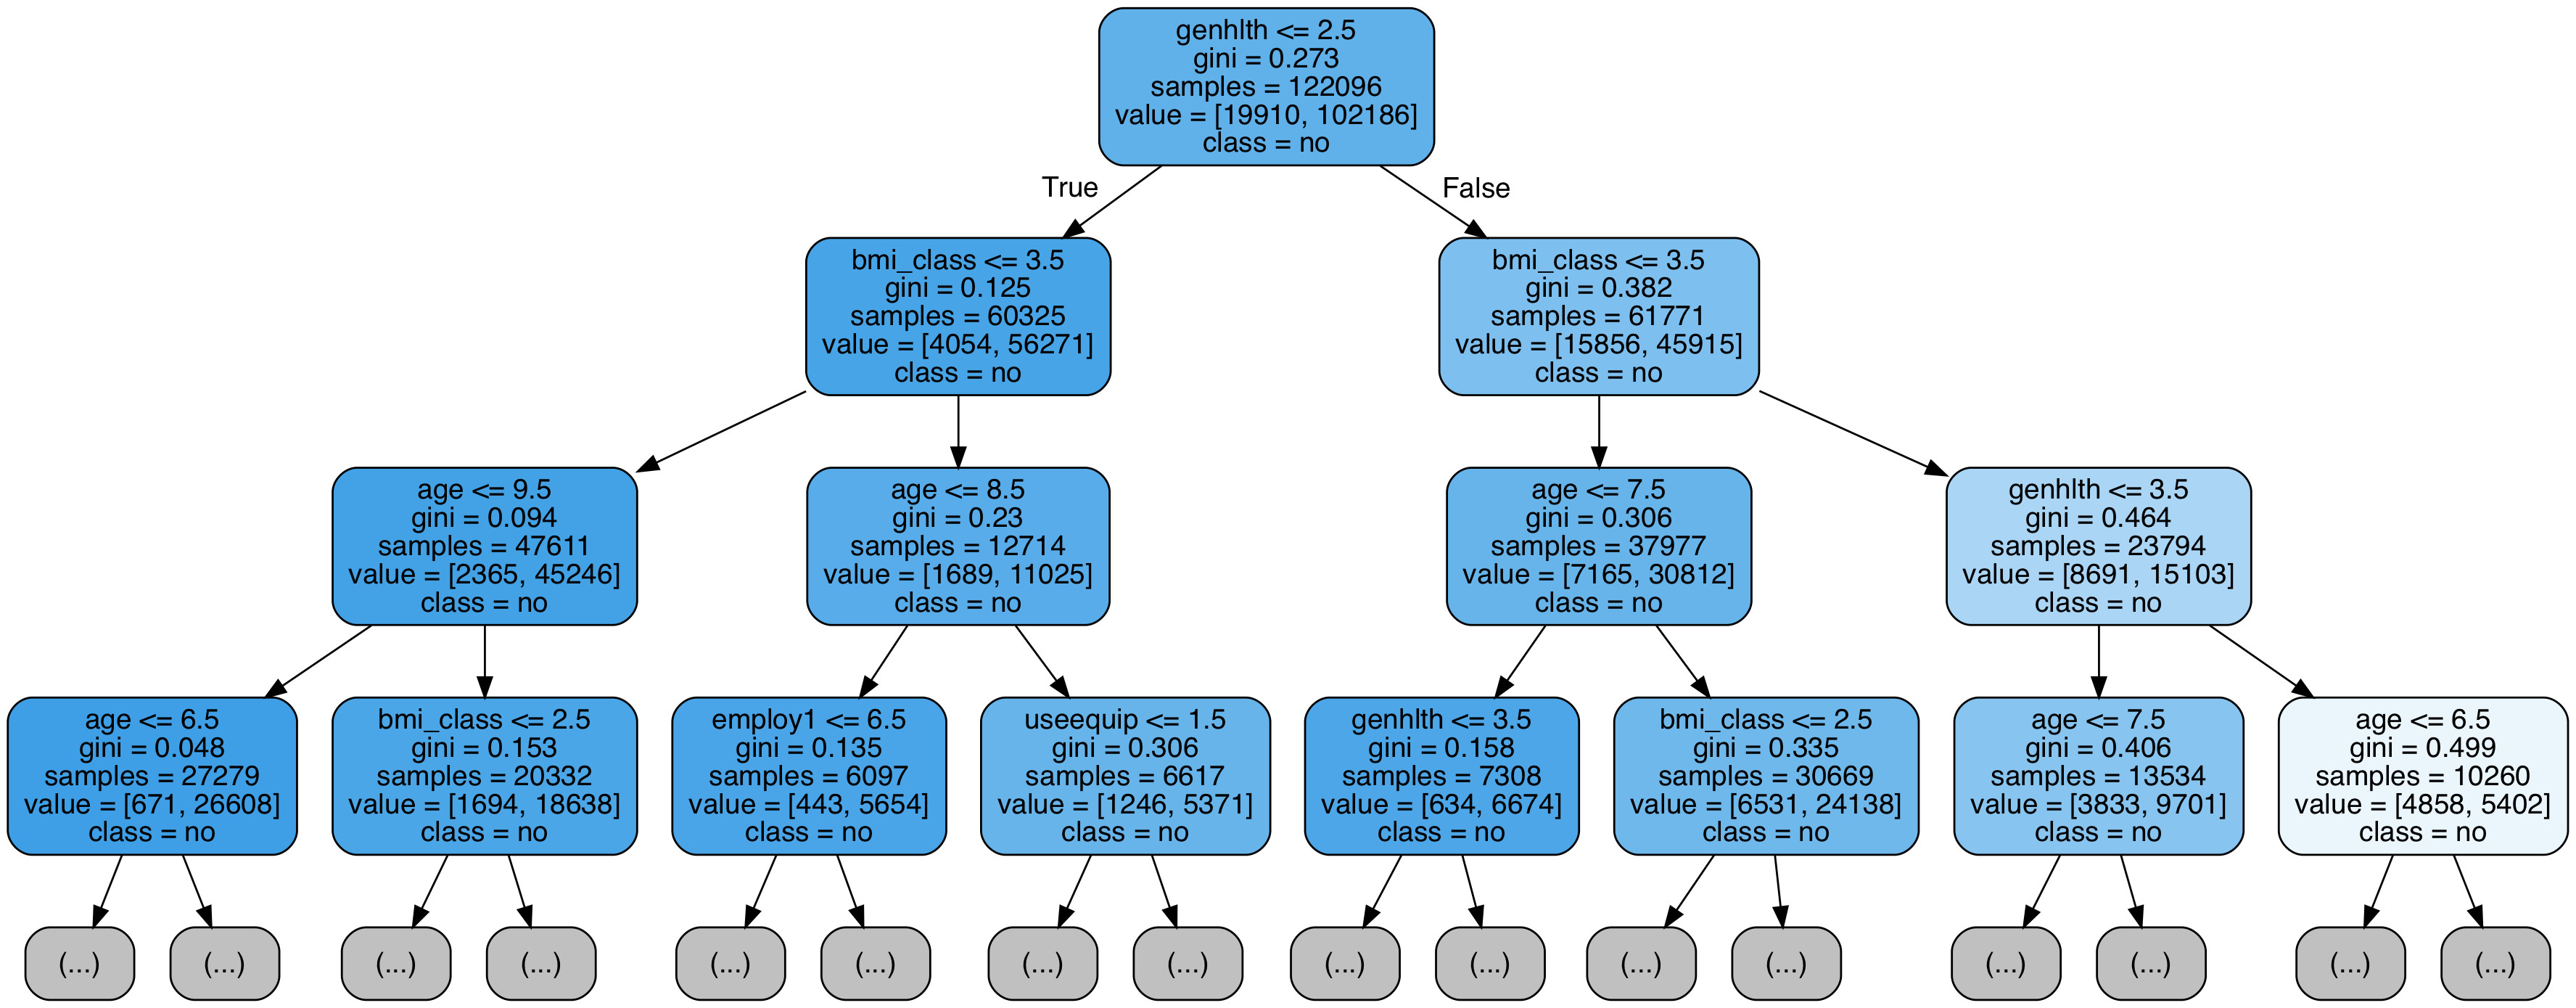

In [17]:
# Save tree as dot file

export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = feature_cols, max_depth = 3,
                class_names = ['yes', 'no'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv=10, scoring= 'accuracy')
np.mean(scores)

0.7620167838366824

## Random Forest Model

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [21]:
# Create the model with 100 trees

model = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=50, n_jobs=-1, verbose = 1)

#Fit the Model on Training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=1,
                       warm_start=False)

In [23]:
#Using fitted model, make predictions
X_train_rf_predictions = model.predict(X_train)
X_train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Calculate roc auc

roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.7811971542162468

In [36]:
# Compute feature importances.
feature_model = pd.DataFrame({'Feature': feature_cols,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_model.head(10)

,Feature,importance
4,income2,0.088824
12,sleptim1,0.086368
1,age,0.084660
0,genhlth,0.074050
6,mscode,0.060297
11,education,0.054168
14,hlthcvr1,0.053178
2,bmi_class,0.052804
15,menthlth,0.051910
10,marital,0.051580


In [37]:
# Compute the out-of-bag score
print((model.oob_score_))

0.835752194994103


In [48]:
# Cross-validation score with 10 k-fold buckets

scores = cross_val_score(model, X, y, cv=10, scoring= 'accuracy')
np.mean(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]:

0.8389614028303619

## Conclusion

1. Defined feature columns and independent variable which is diabetes3
2. Splitted the data on training and testing sets assigning 70% and 30% respectevely
3. Used various statistical libraries along with Scikit-Learn library which provides Random Forest classifier function
4. Fitted the model on the Training Data
5. Used fitted model to make predictions on Testing Data

Results:
Single Decesion Tree
1. ROC AUC: 0.59
3. Cross-Validation Score: 0.76


Random Forest
1. ROC AUC:  0.78
2. Out-of-Bag Error score: 0.84
3. Cross-Validation Score: 0.84